# SMAI Assignment - 3

## Question - `3` : Knowing MLPs

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

## Please read the following before moving on

Welcome to the world of Multilayer Perceptrons (MLP)! You already know that MLPs are feedforward neural networks consisting of multiple layers of nodes or neurons. These networks are well-suited for a wide range of classification and regression tasks, thanks to their ability to learn complex, non-linear relationships between inputs and outputs.

In this assignment, we will be working with the MNIST dataset to explore the importance of different MLP components. The MNIST dataset consists of 70,000 handwritten digit images, each of which is 28x28 pixels in size. Our goal is to use an MLP to classify these images into one of 10 categories (0-9).

To improve the performance of our MLP, we will experiment with various techniques such as Dropout, Batch Normalization, Loss Functions, Stochastic batch and mini-batch gradient descent, and more. Please note, you must use mini-batch unless explicity specified.

In addition, we will experiment with different optimization algorithms such as stochastic gradient descent, Adam, and RMSprop to find the optimal weights and biases for our MLP. We will use stochastic batch and mini-batch gradient descent, which involve updating the weights and biases of the network based on a small batch of randomly sampled training examples, to speed up the training process and reduce memory usage.

By the end of this assignment, you will have gained a deeper understanding of the various components that make up an MLP and their importance in achieving high performance in classification tasks. You will have gained hands-on experience in experimenting with these components and learned how to fine-tune an MLP to achieve the best possible performance on the MNIST dataset. So, let's get started!

🫵Pro-tip: Do not re-write any results so as to re-use them in later experiments for tabulation and plotting.

💭Trivia: Did you know code written using ChatGPT is easy to catch?

### Step zero: Import Libraries

In [72]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
import warnings
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings("ignore")
from tqdm import tqdm

### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [73]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [74]:
trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64
                                                    , shuffle=True, num_workers=2)
trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1
                                                     , shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

In [75]:
pbar = tqdm(total=len(trainloader_minibatch))
for idx, (data,label) in enumerate(trainloader_minibatch):
    print(idx,data.size(),label.size())
    pbar.update(1)
    break
pbar.refresh()

  0%|          | 1/938 [00:00<02:33,  6.11it/s]

0 torch.Size([64, 1, 28, 28]) torch.Size([64])


True

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [81]:

class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP,self).__init__()
        # code here
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self,x):
        # code here
        x = x.view(-1, 784) # flatten the input images
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [82]:
mlp1 = SimpleMLP()
mlp2 = SimpleMLP()
mlp3 = SimpleMLP()
mlp4 = SimpleMLP()
mlp5 = SimpleMLP()
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss()
criterion3 = nn.CrossEntropyLoss()
criterion4 = nn.CrossEntropyLoss()
criterion5 = nn.CrossEntropyLoss()

### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [96]:
# code here
import torch.optim as optim
sgd_optimizer = optim.SGD(mlp1.parameters(), lr=0.01)
momentum_optimizer = optim.SGD(mlp2.parameters(), lr=0.01, momentum=0.9)
l2_optimizer = optim.SGD(mlp3.parameters(), lr=0.01, weight_decay=1e-5)
rmsprop_optimizer = optim.RMSprop(mlp4.parameters(), lr=0.001)
adam_optimizer = optim.Adam(mlp5.parameters(), lr=0.001)


### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.

In [92]:
# code, plots and explainiation here
import matplotlib.pyplot as plt
x = [i+1 for i in range(10)]
def plot_losses(train_loss,val_loss):
  plt.plot(x, train_loss, label='train_loss')
  plt.plot(x, val_loss, label='val_loss')
  plt.legend()
  plt.show()

In [62]:
len(trainloader_minibatch)

938

Training with SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Epoch 1 - Train Loss: 0.216, Test Loss: 0.206, Accuracy: 0.942
Epoch 2 - Train Loss: 0.204, Test Loss: 0.199, Accuracy: 0.941
Epoch 3 - Train Loss: 0.193, Test Loss: 0.189, Accuracy: 0.947
Epoch 4 - Train Loss: 0.183, Test Loss: 0.179, Accuracy: 0.947
Epoch 5 - Train Loss: 0.174, Test Loss: 0.170, Accuracy: 0.950
Epoch 6 - Train Loss: 0.166, Test Loss: 0.165, Accuracy: 0.952
Epoch 7 - Train Loss: 0.158, Test Loss: 0.158, Accuracy: 0.953
Epoch 8 - Train Loss: 0.151, Test Loss: 0.153, Accuracy: 0.956
Epoch 9 - Train Loss: 0.144, Test Loss: 0.146, Accuracy: 0.956
Epoch 10 - Train Loss: 0.138, Test Loss: 0.142, Accuracy: 0.957


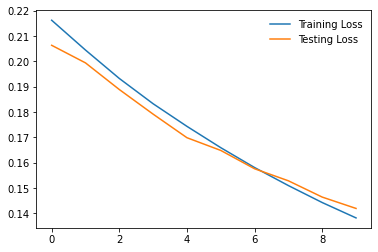

Training with SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
Epoch 1 - Train Loss: 0.563, Test Loss: 0.233, Accuracy: 0.932
Epoch 2 - Train Loss: 0.195, Test Loss: 0.166, Accuracy: 0.949
Epoch 3 - Train Loss: 0.133, Test Loss: 0.124, Accuracy: 0.962
Epoch 4 - Train Loss: 0.101, Test Loss: 0.104, Accuracy: 0.969
Epoch 5 - Train Loss: 0.081, Test Loss: 0.087, Accuracy: 0.972
Epoch 6 - Train Loss: 0.067, Test Loss: 0.085, Accuracy: 0.974
Epoch 7 - Train Loss: 0.056, Test Loss: 0.079, Accuracy: 0.975
Epoch 8 - Train Loss: 0.049, Test Loss: 0.078, Accuracy: 0.976
Epoch 9 - Train Loss: 0.041, Test Loss: 0.072, Accuracy: 0.978
Epoch 10 - Train Loss: 0.036, Test Loss: 0.074, Accuracy: 0.976


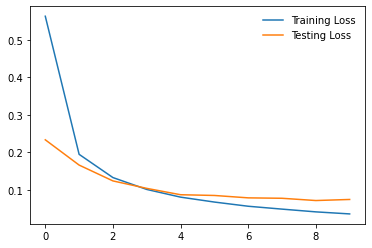

Training with SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 1e-05
)
Epoch 1 - Train Loss: 1.816, Test Loss: 0.878, Accuracy: 0.785
Epoch 2 - Train Loss: 0.593, Test Loss: 0.431, Accuracy: 0.882
Epoch 3 - Train Loss: 0.405, Test Loss: 0.356, Accuracy: 0.898
Epoch 4 - Train Loss: 0.353, Test Loss: 0.319, Accuracy: 0.907
Epoch 5 - Train Loss: 0.323, Test Loss: 0.299, Accuracy: 0.912
Epoch 6 - Train Loss: 0.300, Test Loss: 0.280, Accuracy: 0.919
Epoch 7 - Train Loss: 0.282, Test Loss: 0.267, Accuracy: 0.924
Epoch 8 - Train Loss: 0.265, Test Loss: 0.250, Accuracy: 0.929
Epoch 9 - Train Loss: 0.250, Test Loss: 0.238, Accuracy: 0.931
Epoch 10 - Train Loss: 0.237, Test Loss: 0.225, Accuracy: 0.934


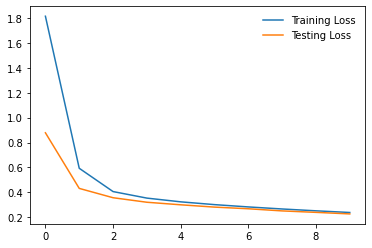

Training with RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)
Epoch 1 - Train Loss: 0.281, Test Loss: 0.149, Accuracy: 0.954
Epoch 2 - Train Loss: 0.125, Test Loss: 0.116, Accuracy: 0.965
Epoch 3 - Train Loss: 0.086, Test Loss: 0.089, Accuracy: 0.972
Epoch 4 - Train Loss: 0.066, Test Loss: 0.082, Accuracy: 0.975
Epoch 5 - Train Loss: 0.051, Test Loss: 0.093, Accuracy: 0.971
Epoch 6 - Train Loss: 0.040, Test Loss: 0.096, Accuracy: 0.973
Epoch 7 - Train Loss: 0.033, Test Loss: 0.092, Accuracy: 0.974
Epoch 8 - Train Loss: 0.027, Test Loss: 0.092, Accuracy: 0.974
Epoch 9 - Train Loss: 0.022, Test Loss: 0.079, Accuracy: 0.980
Epoch 10 - Train Loss: 0.020, Test Loss: 0.088, Accuracy: 0.978


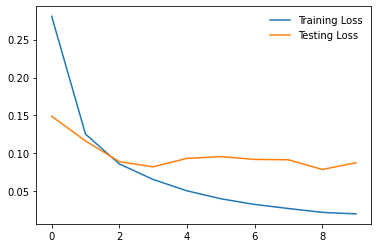

Training with Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Epoch 1 - Train Loss: 0.353, Test Loss: 0.177, Accuracy: 0.947
Epoch 2 - Train Loss: 0.149, Test Loss: 0.118, Accuracy: 0.965
Epoch 3 - Train Loss: 0.101, Test Loss: 0.097, Accuracy: 0.970
Epoch 4 - Train Loss: 0.076, Test Loss: 0.082, Accuracy: 0.975
Epoch 5 - Train Loss: 0.060, Test Loss: 0.080, Accuracy: 0.975
Epoch 6 - Train Loss: 0.049, Test Loss: 0.084, Accuracy: 0.975
Epoch 7 - Train Loss: 0.038, Test Loss: 0.075, Accuracy: 0.978
Epoch 8 - Train Loss: 0.031, Test Loss: 0.076, Accuracy: 0.978
Epoch 9 - Train Loss: 0.027, Test Loss: 0.071, Accuracy: 0.979
Epoch 10 - Train Loss: 0.022, Test Loss: 0.076, Accuracy: 0.980


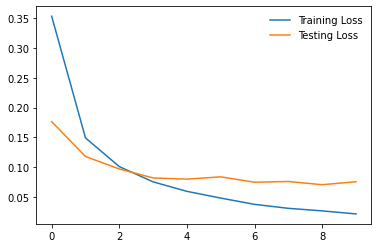

Final Accuracy: 0.980


In [100]:
def train(model, optimizer, criterion, trainloader):
    train_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
    return train_loss/len(trainloader.dataset)

# Define a function to test the model
def test(model, criterion, testloader):
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()*images.size(0)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return test_loss/len(testloader.dataset), correct/total

# Define a function to plot the training and testing losses
def plot_losses(train_losses, test_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(test_losses, label='Testing Loss')
    plt.legend(frameon=False)
    plt.show()

# Train and test the model using different optimizers
train_losses = []
test_losses = []
accuracies = []
f1_scores = []

optimizers = [optim.SGD(mlp1.parameters(), lr=0.01),
              optim.SGD(mlp2.parameters(), lr=0.01, momentum=0.9),
              optim.SGD(mlp3.parameters(), lr=0.01, weight_decay=1e-5),
              optim.RMSprop(mlp4.parameters(), lr=0.001),
              optim.Adam(mlp5.parameters(), lr=0.001)]

model = [mlp1,mlp2,mlp3,mlp4,mlp5]
criterion = [criterion1,criterion2,criterion3,criterion4,criterion5]
ind=0
for optimizer in optimizers:
    print(f'Training with {optimizer}')
    model[ind].train()

    for epoch in range(10):
        train_loss = train(model[ind], optimizer, criterion[ind], trainloader_minibatch)
        test_loss, accuracy = test(model[ind], criterion[ind], testloader)
        print(f'Epoch {epoch+1} - Train Loss: {train_loss:.3f}, Test Loss: {test_loss:.3f}, Accuracy: {accuracy:.3f}')
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        accuracies.append(accuracy)

    # Plot the training and testing losses
    ind+=1
    plot_losses(train_losses[-10:], test_losses[-10:])
    
print(f'Final Accuracy: {accuracies[-1]:.3f}')

In [101]:
model[0].eval()

y_true_train = []
y_pred_train = []

for images_train, labels_train in trainloader_minibatch:
  output_train = model[0](images_train)
  _, predicted_train = torch.max(output_train.data, 1)

  y_true_train.extend(labels_train.tolist())
  y_pred_train.extend(predicted_train.tolist())

print('Train Classification Report:')
print(classification_report(y_true_train,y_pred_train))

y_true_test = []
y_pred_test = []

for images_test, labels_test in testloader:
  output_test = model[0](images_test)
  _, predicted_test = torch.max(output_test.data, 1)

  y_true_test.extend(labels_test.tolist())
  y_pred_test.extend(predicted_test.tolist())

print('Test Classification Report:')
print(classification_report(y_true_test,y_pred_test))

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5923
           1       0.97      0.98      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.97      0.94      0.95      6131
           4       0.96      0.96      0.96      5842
           5       0.95      0.96      0.96      5421
           6       0.97      0.97      0.97      5918
           7       0.97      0.97      0.97      6265
           8       0.95      0.95      0.95      5851
           9       0.95      0.94      0.95      5949

    accuracy                           0.96     60000
   macro avg       0.96      0.96      0.96     60000
weighted avg       0.96      0.96      0.96     60000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.

### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.
Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.

Training with <torch.optim.lr_scheduler.ExponentialLR object at 0x7fa00d4d5160>
Epoch 1 - Train Loss: 0.337, Test Loss: 0.179, Accuracy: 0.947
Epoch 2 - Train Loss: 0.137, Test Loss: 0.123, Accuracy: 0.963
Epoch 3 - Train Loss: 0.103, Test Loss: 0.110, Accuracy: 0.966
Epoch 4 - Train Loss: 0.088, Test Loss: 0.101, Accuracy: 0.970
Epoch 5 - Train Loss: 0.081, Test Loss: 0.099, Accuracy: 0.970
Epoch 6 - Train Loss: 0.078, Test Loss: 0.098, Accuracy: 0.970
Epoch 7 - Train Loss: 0.076, Test Loss: 0.097, Accuracy: 0.970
Epoch 8 - Train Loss: 0.075, Test Loss: 0.097, Accuracy: 0.970
Epoch 9 - Train Loss: 0.074, Test Loss: 0.097, Accuracy: 0.970
Epoch 10 - Train Loss: 0.074, Test Loss: 0.096, Accuracy: 0.970


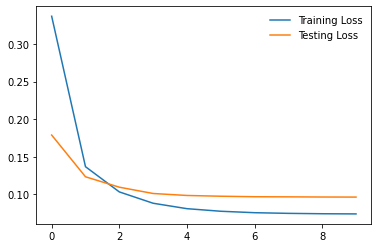

Training with <torch.optim.lr_scheduler.MultiStepLR object at 0x7fa00d4d5340>
Epoch 1 - Train Loss: 0.337, Test Loss: 0.196, Accuracy: 0.941
Epoch 2 - Train Loss: 0.135, Test Loss: 0.116, Accuracy: 0.963
Epoch 3 - Train Loss: 0.091, Test Loss: 0.086, Accuracy: 0.973
Epoch 4 - Train Loss: 0.069, Test Loss: 0.087, Accuracy: 0.973
Epoch 5 - Train Loss: 0.055, Test Loss: 0.088, Accuracy: 0.972
Epoch 6 - Train Loss: 0.030, Test Loss: 0.067, Accuracy: 0.979
Epoch 7 - Train Loss: 0.026, Test Loss: 0.065, Accuracy: 0.979
Epoch 8 - Train Loss: 0.023, Test Loss: 0.066, Accuracy: 0.980
Epoch 9 - Train Loss: 0.022, Test Loss: 0.068, Accuracy: 0.979
Epoch 10 - Train Loss: 0.020, Test Loss: 0.066, Accuracy: 0.979


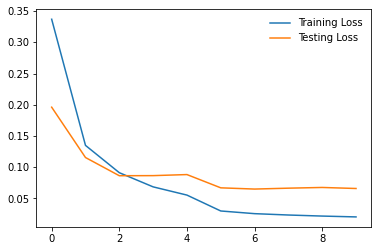

Final Accuracy: 0.979


In [108]:

import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR, MultiStepLR

mlp1 = SimpleMLP()
mlp2 = SimpleMLP()
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss()
criterion = [criterion1,criterion2]
model = [mlp1,mlp2]
optimizers = [optim.Adam(mlp1.parameters(), lr=0.001),optim.Adam(mlp2.parameters(), lr=0.001)]

# Define a function to train the model
def train(model, optimizer, criterion, trainloader):
    train_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
    return train_loss/len(trainloader.dataset)

# Define a function to test the model
def test(model, criterion, testloader):
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()*images.size(0)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return test_loss/len(testloader.dataset), correct/total

# Define a function to plot the training and testing losses
def plot_losses(train_losses, test_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(test_losses, label='Testing Loss')
    plt.legend(frameon=False)
    plt.show()

# Train and test the model using different lr_schedulers
train_losses = []
test_losses = []
accuracies = []
f1_scores = []

schedulers = [ExponentialLR(optimizers[0], gamma = 0.5),
              MultiStepLR(optimizers[1],milestones=[5],gamma=0.1)]

ind = 0
for scheduler in schedulers:
    print(f'Training with {scheduler}')
    model[ind].train()
    
    # Reset the optimizer and scheduler at the start of each run
    optimizers[ind].zero_grad()
    scheduler.last_epoch = -1
    
    for epoch in range(10):
        # Update the learning rate according to the scheduler at each epoch
        scheduler.step()
        
        train_loss = train(model[ind], optimizers[ind], criterion[ind], trainloader_minibatch)
        test_loss, accuracy = test(model[ind], criterion[ind], testloader)
        
        print(f'Epoch {epoch+1} - Train Loss: {train_loss:.3f}, Test Loss: {test_loss:.3f}, Accuracy: {accuracy:.3f}')
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        accuracies.append(accuracy)

    # Plot the training and testing losses
    ind+=1
    plot_losses(train_losses[-10:], test_losses[-10:])
    
print(f'Final Accuracy: {accuracies[-1]:.3f}')

In [114]:
import pandas as pd
ind = 0
a = []
results_df = pd.DataFrame(columns=['Scheduler', 'Accuracy'])
for scheduler in ['ExponentialLR', 'MultiStepLR']:
  model[ind].eval()
  if scheduler == 'None':
      optimizers[ind].zero_grad()
      for epoch in range(10):
          train_loss = train(model[ind], optimizers[ind], criterion[ind], trainloader_minibatch)
          test_loss, accuracy = test(model[ind],criterion[ind],testloader)

      results_df.loc[len(results_df)] = [scheduler,f'{accuracy:.3f}']
      
  elif scheduler == 'ExponentialLR':
      optimizers[ind].zero_grad()
      scheduler_mul_lr=optim.lr_scheduler.ExponentialLR(optimizers[ind],last_epoch=-1,gamma = 0.5)

      for epoch in range(10):
          scheduler_mul_lr.step()
          train_loss=train(model=model[ind],
                            optimizer=optimizers[ind],
                            criterion=criterion[ind],
                            trainloader=trainloader_minibatch)

          test_loss,test_accuracy=test(model=model[ind],
                                        criterion=criterion[ind],
                                        testloader=testloader)

      results_df.loc[len(results_df)] = [scheduler,f'{test_accuracy:.3f}']
      
  elif scheduler == 'MultiStepLR':
      optimizers[ind].zero_grad()
      milestones=[5]
      gamma=0.1

      scheduler_multi_step_lr=optim.lr_scheduler.MultiStepLR(optimizers[ind],
                                                             milestones=milestones,gamma=0.1)
      for epoch in range(10):
          scheduler_mul_lr.step()
          train_loss=train(model=model[ind],
                            optimizer=optimizers[ind],
                            criterion=criterion[ind],
                            trainloader=trainloader_minibatch)

          test_loss,test_accuracy=test(model=model[ind],
                                        criterion=criterion[ind],
                                        testloader=testloader)

      results_df.loc[len(results_df)] = [scheduler,f'{test_accuracy:.3f}']
  ind+=1

In [115]:
results_df

,Scheduler,Accuracy
0,ExponentialLR,0.971
1,MultiStepLR,0.980


### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

In [126]:
# code here
import torch.nn as nn
import torch.nn.functional as F
# Define a model with BatchNorm
class ModelWithBatchNorm(nn.Module):
    def __init__(self):
        super(ModelWithBatchNorm, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.bn1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x)
        return x

# Define a model with Dropout
class ModelWithDropout(nn.Module):
    def __init__(self):
        super(ModelWithDropout, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Define a model with BatchNorm and Dropout
class ModelWithBatchNormAndDropout(nn.Module):
    def __init__(self):
        super(ModelWithBatchNormAndDropout, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.

Training with ModelWithBatchNormAndDropout(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Epoch 1 - Train Loss: 0.671, Test Loss: 0.336, Accuracy: 0.916
Epoch 2 - Train Loss: 0.298, Test Loss: 0.242, Accuracy: 0.936
Epoch 3 - Train Loss: 0.227, Test Loss: 0.200, Accuracy: 0.943
Epoch 4 - Train Loss: 0.191, Test Loss: 0.172, Accuracy: 0.952
Epoch 5 - Train Loss: 0.167, Test Loss: 0.158, Accuracy: 0.953
Epoch 6 - Train Loss: 0.148, Test Loss: 0.152, Accuracy: 0.956
Epoch 7 - Train Loss: 0.134, Test Loss: 0.139, Accuracy: 0.959
Epoch 8 - Train Loss: 0.125, Test Loss: 0.139, Accuracy: 0.959
Epoch 9 - Train Loss: 0.117, Test Loss: 0.135

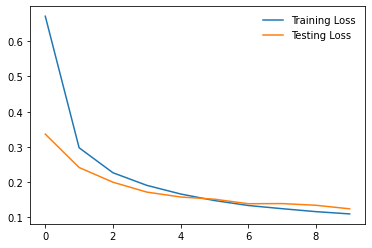

Training with ModelWithDropout(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)
Epoch 1 - Train Loss: 1.884, Test Loss: 1.164, Accuracy: 0.639
Epoch 2 - Train Loss: 0.882, Test Loss: 0.695, Accuracy: 0.792
Epoch 3 - Train Loss: 0.627, Test Loss: 0.538, Accuracy: 0.841
Epoch 4 - Train Loss: 0.522, Test Loss: 0.472, Accuracy: 0.863
Epoch 5 - Train Loss: 0.459, Test Loss: 0.415, Accuracy: 0.879
Epoch 6 - Train Loss: 0.416, Test Loss: 0.392, Accuracy: 0.884
Epoch 7 - Train Loss: 0.385, Test Loss: 0.360, Accuracy: 0.899
Epoch 8 - Train Loss: 0.357, Test Loss: 0.340, Accuracy: 0.901
Epoch 9 - Train Loss: 0.336, Test Loss: 0.311, Accuracy: 0.910
Epoch 10 - Train Loss: 0.317, Test Loss: 0.293, Accuracy: 0.910


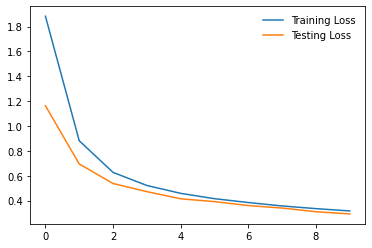

Training with ModelWithBatchNorm(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)
Epoch 1 - Train Loss: 0.468, Test Loss: 0.220, Accuracy: 0.944
Epoch 2 - Train Loss: 0.184, Test Loss: 0.153, Accuracy: 0.959
Epoch 3 - Train Loss: 0.130, Test Loss: 0.124, Accuracy: 0.966
Epoch 4 - Train Loss: 0.101, Test Loss: 0.110, Accuracy: 0.969
Epoch 5 - Train Loss: 0.083, Test Loss: 0.100, Accuracy: 0.972
Epoch 6 - Train Loss: 0.069, Test Loss: 0.096, Accuracy: 0.972
Epoch 7 - Train Loss: 0.058, Test Loss: 0.089, Accuracy: 0.973
Epoch 8 - Train Loss: 0.051, Test Loss: 0.087, Accuracy: 0.976
Epoch 9 - Train Loss: 0.043, Test Loss: 0.086, Accuracy: 0.974
Epoch 10 - Train Loss: 0.038, Te

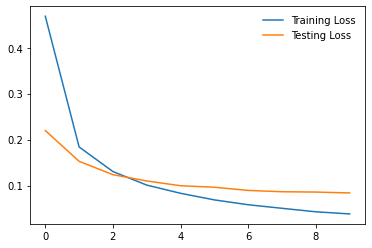

Final Accuracy: 0.974


In [127]:
def train(model, optimizer, criterion, trainloader):
    train_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
    return train_loss/len(trainloader.dataset)

# Define a function to test the model
def test(model, criterion, testloader):
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()*images.size(0)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return test_loss/len(testloader.dataset), correct/total

# Define a function to plot the training and testing losses
def plot_losses(train_losses, test_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(test_losses, label='Testing Loss')
    plt.legend(frameon=False)
    plt.show()

# Train and test the model using different optimizers
train_losses = []
test_losses = []
accuracies = []
f1_scores = []

mlp1 = ModelWithBatchNormAndDropout() 
mlp2 = ModelWithDropout()
mlp3 = ModelWithBatchNorm()
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss()
criterion3 = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(mlp1.parameters(), lr=0.01)
optimizer2 = optim.SGD(mlp2.parameters(), lr=0.01)
optimizer3 = optim.SGD(mlp3.parameters(), lr=0.01)
model = [mlp1,mlp2,mlp3]
optimizers = [optimizer1,optimizer2,optimizer3]
criterion = [criterion1,criterion2,criterion3]
ind=0
for optimizer in optimizers:
    print(f'Training with {model[ind]}')
    model[ind].train()

    for epoch in range(10):
        train_loss = train(model[ind], optimizer, criterion[ind], trainloader_minibatch)
        test_loss, accuracy = test(model[ind], criterion[ind], testloader)
        print(f'Epoch {epoch+1} - Train Loss: {train_loss:.3f}, Test Loss: {test_loss:.3f}, Accuracy: {accuracy:.3f}')
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        accuracies.append(accuracy)

    # Plot the training and testing losses
    ind+=1
    plot_losses(train_losses[-10:], test_losses[-10:])
    
print(f'Final Accuracy: {accuracies[-1]:.3f}')

In [121]:
model[0].eval()

y_true_train = []
y_pred_train = []

for images_train, labels_train in trainloader_minibatch:
  output_train = model[0](images_train)
  _, predicted_train = torch.max(output_train.data, 1)

  y_true_train.extend(labels_train.tolist())
  y_pred_train.extend(predicted_train.tolist())

print('Train Classification Report:')
print(classification_report(y_true_train,y_pred_train))

y_true_test = []
y_pred_test = []

for images_test, labels_test in testloader:
  output_test = model[0](images_test)
  _, predicted_test = torch.max(output_test.data, 1)

  y_true_test.extend(labels_test.tolist())
  y_pred_test.extend(predicted_test.tolist())

print('Test Classification Report:')
print(classification_report(y_true_test,y_pred_test))

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      0.99      5958
           3       0.99      1.00      0.99      6131
           4       1.00      0.99      0.99      5842
           5       0.99      1.00      0.99      5421
           6       0.99      1.00      1.00      5918
           7       1.00      0.99      0.99      6265
           8       1.00      0.99      1.00      5851
           9       0.98      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.

### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!

Training with <torch.utils.data.dataloader.DataLoader object at 0x7fa00ce2bfa0>
Epoch 1 - Train Loss: 1.744, Test Loss: 0.818, Accuracy: 0.811
Epoch 2 - Train Loss: 0.586, Test Loss: 0.437, Accuracy: 0.879
Epoch 3 - Train Loss: 0.410, Test Loss: 0.357, Accuracy: 0.895
Epoch 4 - Train Loss: 0.351, Test Loss: 0.321, Accuracy: 0.907
Epoch 5 - Train Loss: 0.319, Test Loss: 0.296, Accuracy: 0.915
Epoch 6 - Train Loss: 0.297, Test Loss: 0.281, Accuracy: 0.919
Epoch 7 - Train Loss: 0.281, Test Loss: 0.266, Accuracy: 0.926
Epoch 8 - Train Loss: 0.266, Test Loss: 0.253, Accuracy: 0.929
Epoch 9 - Train Loss: 0.252, Test Loss: 0.242, Accuracy: 0.930
Epoch 10 - Train Loss: 0.240, Test Loss: 0.231, Accuracy: 0.933


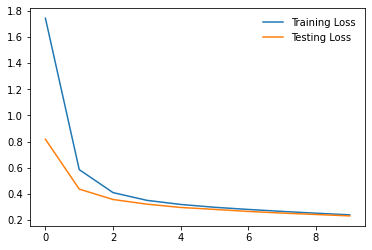

Training with <torch.utils.data.dataloader.DataLoader object at 0x7fa00ce2bac0>
Epoch 1 - Train Loss: 0.256, Test Loss: 0.122, Accuracy: 0.961
Epoch 2 - Train Loss: 0.110, Test Loss: 0.107, Accuracy: 0.969
Epoch 3 - Train Loss: 0.080, Test Loss: 0.100, Accuracy: 0.971
Epoch 4 - Train Loss: 0.066, Test Loss: 0.089, Accuracy: 0.972
Epoch 5 - Train Loss: 0.052, Test Loss: 0.077, Accuracy: 0.978
Epoch 6 - Train Loss: 0.043, Test Loss: 0.089, Accuracy: 0.975
Epoch 7 - Train Loss: 0.039, Test Loss: 0.090, Accuracy: 0.975
Epoch 8 - Train Loss: 0.036, Test Loss: 0.091, Accuracy: 0.977
Epoch 9 - Train Loss: 0.030, Test Loss: 0.103, Accuracy: 0.972
Epoch 10 - Train Loss: 0.023, Test Loss: 0.087, Accuracy: 0.978


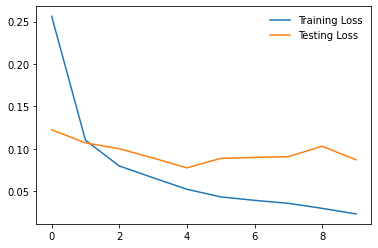

Final Accuracy: 0.978


In [123]:
# code here
def train(model, optimizer, criterion, trainloader):
    train_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
    return train_loss/len(trainloader.dataset)

# Define a function to test the model
def test(model, criterion, testloader):
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()*images.size(0)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return test_loss/len(testloader.dataset), correct/total

# Define a function to plot the training and testing losses
def plot_losses(train_losses, test_losses):
    plt.plot(train_losses, label='Training Loss')
    plt.plot(test_losses, label='Testing Loss')
    plt.legend(frameon=False)
    plt.show()

# Train and test the model using different optimizers
train_losses = []
test_losses = []
accuracies = []
f1_scores = []

mlp1 = SimpleMLP() 
mlp2 = SimpleMLP()
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(mlp1.parameters(), lr=0.01)
optimizer2 = optim.SGD(mlp2.parameters(), lr=0.01)
model = [mlp1,mlp2]
optimizers = [optimizer1,optimizer2]
criterion = [criterion1,criterion2]
ds = [trainloader_minibatch,trainloader_stochastic]
ind=0
for optimizer in optimizers:
    print(f'Training with {ds[ind]}')
    model[ind].train()

    for epoch in range(10):
        train_loss = train(model[ind], optimizer, criterion[ind], ds[ind])
        test_loss, accuracy = test(model[ind], criterion[ind], testloader)
        print(f'Epoch {epoch+1} - Train Loss: {train_loss:.3f}, Test Loss: {test_loss:.3f}, Accuracy: {accuracy:.3f}')
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        accuracies.append(accuracy)

    # Plot the training and testing losses
    ind+=1
    plot_losses(train_losses[-10:], test_losses[-10:])
    
print(f'Final Accuracy: {accuracies[-1]:.3f}')

### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

In [ ]:
# text here